In [1]:
import pandas as pd
import seaborn as sns

df= pd.read_csv('email_phishing_data.csv')

print(df.columns)

Index(['num_words', 'num_unique_words', 'num_stopwords', 'num_links',
       'num_unique_domains', 'num_email_addresses', 'num_spelling_errors',
       'num_urgent_keywords', 'label'],
      dtype='object')


In [18]:
df.head()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


In [19]:
df.describe()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
count,5.248460e+05,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000
mean,2.762280e+02,123.012167,80.045465,0.895588,0.347767,2.114897,24.694731,0.245301,0.013240
std,3.335457e+03,201.626478,1023.330380,5.603001,1.774209,13.592682,311.312358,0.559320,0.114301
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000e+01,38.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.200000e+02,79.000000,34.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,2.690000e+02,145.000000,79.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000
max,2.339682e+06,51251.000000,720411.000000,824.000000,524.000000,1150.000000,190104.000000,7.000000,1.000000


In [2]:
df['num_words'].describe()
df['num_words'].value_counts().sort_index()

num_words
0            8
1           18
2           69
3          559
4          692
          ... 
55145        1
63501        1
101796       1
103407       1
2339682      1
Name: count, Length: 4278, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   num_words            524846 non-null  int64
 1   num_unique_words     524846 non-null  int64
 2   num_stopwords        524846 non-null  int64
 3   num_links            524846 non-null  int64
 4   num_unique_domains   524846 non-null  int64
 5   num_email_addresses  524846 non-null  int64
 6   num_spelling_errors  524846 non-null  int64
 7   num_urgent_keywords  524846 non-null  int64
 8   label                524846 non-null  int64
dtypes: int64(9)
memory usage: 36.0 MB


<Axes: xlabel='num_words'>

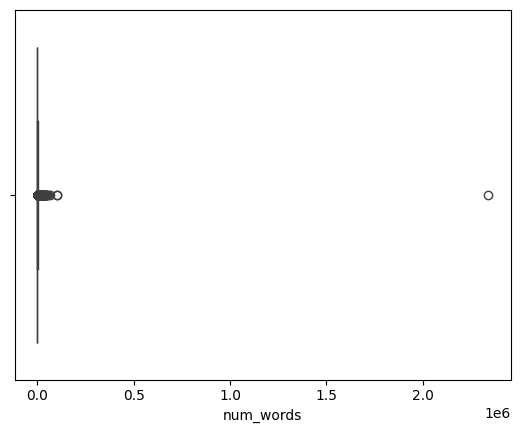

In [3]:
sns.boxplot(x=df['num_words'])

<Axes: xlabel='num_words'>

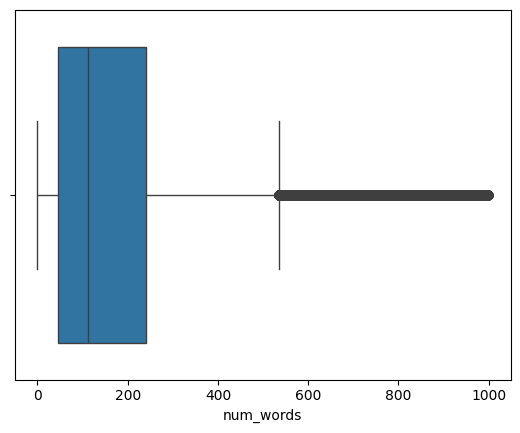

In [41]:
sns.boxplot(x=df[df['num_words'] < 1000]['num_words'])

<Axes: xlabel='num_words', ylabel='Count'>

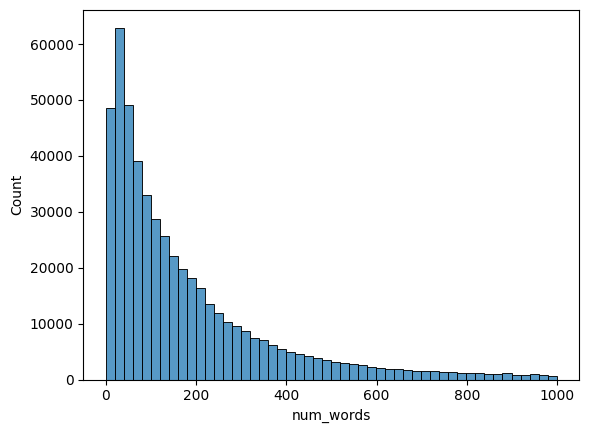

In [12]:
#מספר מילים במייל
#sns.histplot(data=df,x='num_words',discrete=True,bins=30)
sns.histplot(data=df[df['num_words'] < 1000], x='num_words', bins=50)

<Axes: xlabel='num_words', ylabel='Count'>

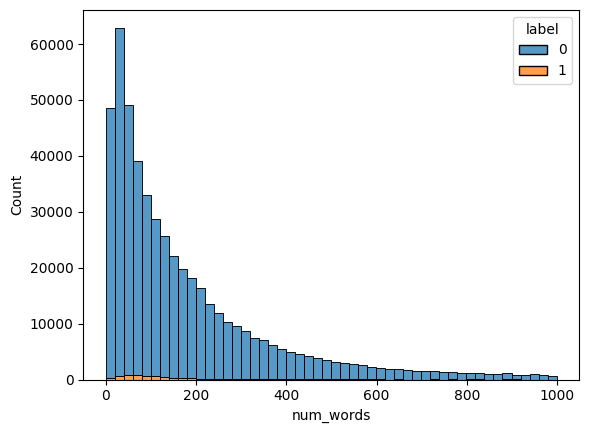

In [29]:
sns.histplot(data=df[df['num_words'] < 1000], x='num_words', bins=50,hue='label',multiple='stack')

<Axes: xlabel='label', ylabel='count'>

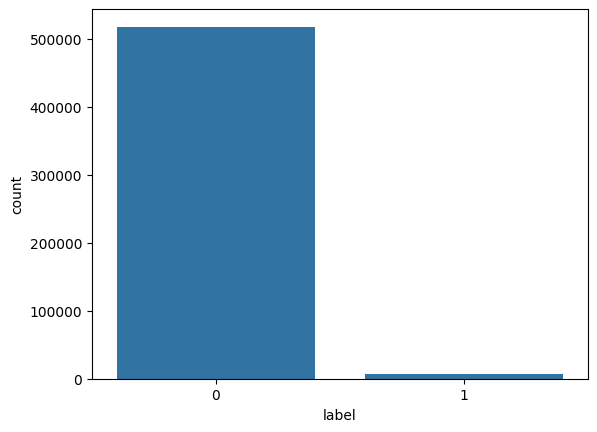

In [15]:
#כמות פישיניג לעומת כאלו שלא
sns.countplot(data=df,x='label')

In [44]:
from sklearn.model_selection import train_test_split

In [47]:
X,y=df.drop(columns='label'),df['label']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.33, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [49]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
clf.score(X_train, y_train)

0.9985013337276692

In [51]:
clf.score(X_test,y_test)

0.9895785219399538

In [52]:
from sklearn.metrics import confusion_matrix

In [64]:
c_matrix=confusion_matrix(y_test, clf.predict(X_test))

<Axes: >

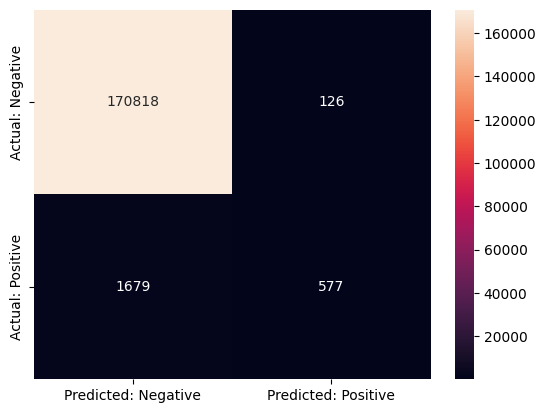

In [65]:
sns.heatmap(c_matrix, annot=True, fmt='g',
            xticklabels=["Predicted: Negative", "Predicted: Positive"], # תחזית של המודל
            yticklabels=["Actual: Negative", "Actual: Positive"])    # ערכי האמת

In [66]:
tn, fp, fn, tp = c_matrix.ravel()

print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 577
False Positives (FP): 126
True Negatives (TN): 170818
False Negatives (FN): 1679


In [68]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Precision (TP / (TP + FP)) : {precision:.2f}")
print(f"Recall (TP / (TP + FN))    : {recall:.2f}")
print(f"F1 Score                   : {f1:.2f}")

Precision (TP / (TP + FP)) : 0.82
Recall (TP / (TP + FN))    : 0.26
F1 Score                   : 0.39


<h5>ניתוח</h5>
<p>
נמוך יחסית Recall-לפי ערכי המדדים ניתן לראות כי ערך ה<br>
False Negatives המשמעות היא שיש כמות גבוהה של <br>
כלומר המודל מפספס בזיהוי תוצאות חיוביות
</p>

##### שיפור
לבדוק איזון בין הקלאסים

In [106]:
clf_2=RandomForestClassifier(class_weight='balanced')
clf_2.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [107]:
clf_2.score(X_train, y_train)

0.9921483537421156

In [108]:
clf_2.score(X_test,y_test)

0.9826096997690531

In [109]:
c_matrix_2=confusion_matrix(y_test, clf_2.predict(X_test))

<Axes: >

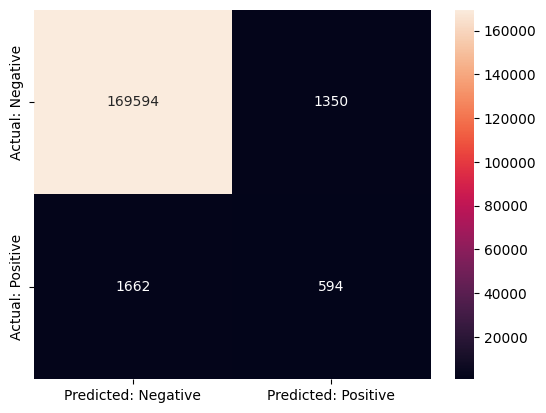

In [110]:
sns.heatmap(c_matrix_2, annot=True, fmt='g',
            xticklabels=["Predicted: Negative", "Predicted: Positive"], # תחזית של המודל
            yticklabels=["Actual: Negative", "Actual: Positive"])    # ערכי האמת

In [111]:
tn_2, fp_2, fn_2, tp_2 = c_matrix_2.ravel()

print(f"True Positives (TP): {tp_2}")
print(f"False Positives (FP): {fp_2}")
print(f"True Negatives (TN): {tn_2}")
print(f"False Negatives (FN): {fn_2}")

True Positives (TP): 594
False Positives (FP): 1350
True Negatives (TN): 169594
False Negatives (FN): 1662


In [112]:
precision_2 = tp_2 / (tp_2 + fp_2)
recall_2 = tp_2 / (tp_2 + fn_2)
f1_2 = 2 * (precision_2 * recall_2) / (precision_2 + recall_2)

print(f"Precision (TP / (TP + FP)) : {precision_2:.2f}")
print(f"Recall (TP / (TP + FN))    : {recall_2:.2f}")
print(f"F1 Score                   : {f1_2:.2f}")

Precision (TP / (TP + FP)) : 0.31
Recall (TP / (TP + FN))    : 0.26
F1 Score                   : 0.28


<h5>ניתוח</h5>
<p>
נמוך יחסית Recall-לפי ערכי המדדים ניתן לראות כי ערך ה<br>
נמוך Precision וכן הערך  <br>
False Positives ושל False Negatives המשמעות היא שיש כמות גבוהה של <br>
כלומר יכולת המודל לא טובה דיה
</p>

##### שיפור
Overfitting נבחן הגבלת עומק למניעת

In [ ]:
clf_3=RandomForestClassifier(max_depth=20,class_weight='balanced')
clf_3.fit(X_train,y_train)